## Project Overview

This project aims to forecast retail trade volumes in the European Union using foundational time series analysis techniques. By leveraging historical data, we will identify trends, patterns, and seasonal variations to provide actionable insights for strategic planning.

### Objectives
1. Analyze historical retail trade volume data to uncover key patterns and trends.
2. Forecast future retail trade volumes using accessible forecasting techniques:
   - Simple Moving Averages (SMA)
   - Exponential Smoothing (ETS)
3. Explore ARIMA as a learning opportunity for advanced time series modeling.
4. Provide actionable insights for stakeholders, emphasizing practical applications in business contexts.

### Tools and Techniques
The project will utilize the following:
- **Python Libraries**: Pandas, NumPy, Matplotlib, Statsmodels
- **Forecasting Techniques**:
  - Simple Moving Averages (SMA)
  - Exponential Smoothing (ETS)
  - Exploratory use of ARIMA
- **Visualization**: Time series plots and forecast overlays to effectively communicate findings.



## Install and Import Required Libraries

### Description
In this step, we will:
1. Install any missing libraries to ensure the environment is ready for analysis.
2. Import the necessary libraries for data processing, visualization, and forecasting.

### Purpose
This ensures that all tools required for data analysis and visualization are available and functional before proceeding to the next steps.



In [8]:
# Install required libraries
!pip install pandas matplotlib statsmodels eurostat --quiet

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


## Load and Explore the Dataset

### Description
In this step, we will:
1. Retrieve the Eurostat Retail Trade Volume Index dataset using the `eurostat` library.
2. Display the first few rows to inspect the data's structure.
3. Check for missing values to ensure data quality.
4. Display dataset information such as column names, data types, and overall shape.

### Purpose
This step is essential to familiarize ourselves with the dataset and ensure it is clean and ready for further analysis.





In [9]:
# Import the required function from the eurostat library
from eurostat import get_data_df

#  Retrieve the dataset using its unique Eurostat code
# 'sts_trtu_m' is the code for retail trade volume index (monthly data)
try:
    data = get_data_df('sts_trtu_m')  # Load the retail trade data
    print("Dataset successfully retrieved!")

    # Display the first 5 rows
    print("\nFirst 5 rows of the dataset:")
    print(data.head())

    # Display dataset information
    print("\nDataset Information:")
    print(data.info())

    # Check for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Display the shape of the dataset
    print(f"\nDataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
except Exception as e:
    print(f"An error occurred while retrieving the dataset: {e}")


Dataset successfully retrieved!

First 5 rows of the dataset:
  freq indic_bt nace_r2 s_adj unit geo\TIME_PERIOD  1991-01  1991-02  1991-03  \
0    M   NETTUR       G    CA  I10              DE      NaN      NaN      NaN   
1    M   NETTUR       G    CA  I10              DK      NaN      NaN      NaN   
2    M   NETTUR       G    CA  I10            EA19      NaN      NaN      NaN   
3    M   NETTUR       G    CA  I10              ES      NaN      NaN      NaN   
4    M   NETTUR       G    CA  I10            EU28      NaN      NaN      NaN   

   1991-04  ...  2024-01  2024-02  2024-03  2024-04  2024-05  2024-06  \
0      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   

   2024-07  

## Dataset Exploration Results

### Observations:
1. **Structure of the Dataset**:
   - The dataset contains **17711 rows** and **412 columns**.
   - Each row represents a combination of metadata (e.g., frequency, geographic region, seasonal adjustment) and corresponding monthly retail trade volume data.
   - Columns include metadata fields (`freq`, `indic_bt`, `nace_r2`, `s_adj`, `unit`, `geo\TIME_PERIOD`) and time series data spanning from **1991-01** to **2024-10**.

2. **Data Types**:
   - The dataset includes **406 numerical columns** (`float64`) representing monthly retail trade volume indices.
   - There are **6 categorical columns** (`object`), including metadata fields.

3. **Missing Values**:
   - Many time series columns contain missing values, with the most recent months having the highest missingness (e.g., **2024-10** has 14303 missing values).
   - Metadata columns (`freq`, `indic_bt`, `nace_r2`, `s_adj`, `unit`, `geo\TIME_PERIOD`) do not contain missing values.

### Relevance to Next Steps:
- The presence of missing values highlights the need for **data cleaning**, including handling missing data through imputation or filtering.
- The metadata columns and the large number of time-related columns confirm that this dataset is structured for **time series analysis** but requires preprocessing for usability.
- The memory usage of **55.7 MB** indicates that this dataset is manageable for analysis in the current environment.

### Purpose:
Understanding the structure and quality of the dataset ensures that we can make informed decisions during the **data cleaning and preprocessing steps**, enabling accurate and reliable time series analysis.


## Data Cleaning and Visualization

### Description:
In this step, we will:
1. Rename columns for clarity.
2. Filter the dataset to focus on relevant rows (e.g., specific regions, seasonal adjustment).
3. Handle missing values using appropriate strategies (e.g., forward-fill).
4. Visualize the cleaned data to gain insights into trends and patterns.

### Purpose:
- Ensure the dataset is well-structured and free of inconsistencies.
- Focus on meaningful subsets of data for analysis.
- Visualize data trends to better understand its behavior before applying models.


Filtered data based on 'geo' and 's_adj'.

Transposed DataFrame Structure:
         214    248    282    534    569    604    731    750    772    917    \
1991-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991-02    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991-03    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991-04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         ...  16552  16740  16770  16983  17026  17239  17282  17608  17648  \
1991-01  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991-02  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991-03  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991-04  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991-05  ...    NaN    NaN    NaN    NaN   

<ipython-input-15-2627f3a4c840>:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series['Retail_Trade_Volume'] = time_series['Retail_Trade_Volume'].fillna(method='ffill')  # Forward-fill


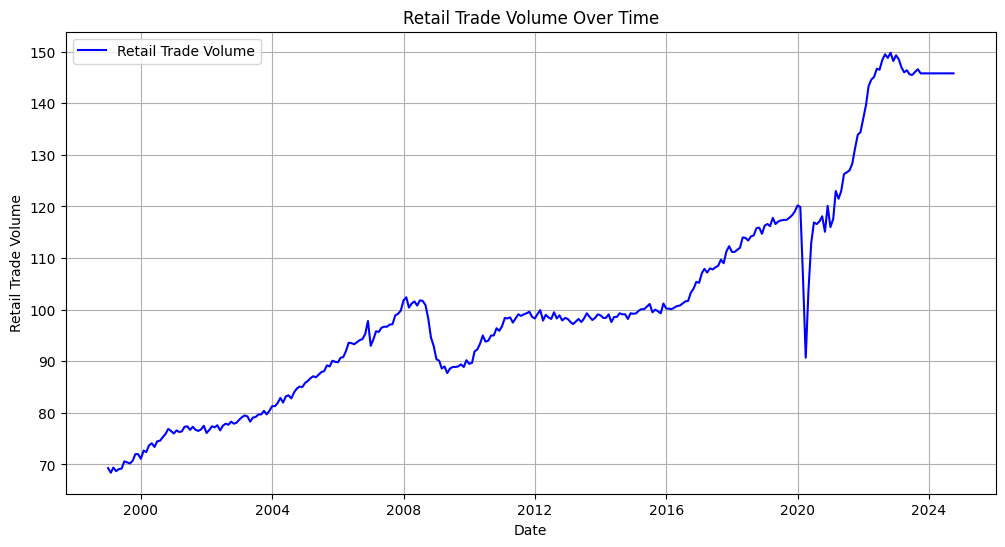


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Retail_Trade_Volume  310 non-null    float64       
 1   Date                 406 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.5 KB
None


In [15]:
# Step 1: Rename columns for clarity (e.g., fix `geo\\TIME_PERIOD`)
if 'geo\\TIME_PERIOD' in data.columns:
    data.rename(columns={'geo\\TIME_PERIOD': 'geo'}, inplace=True)

# Step 2: Filter the dataset for a specific region and seasonally adjusted data
try:
    # Filter for EU27_2020 region and seasonally adjusted data ('SCA')
    filtered_data = data[(data['geo'] == 'EU27_2020') & (data['s_adj'] == 'SCA')]
    print("Filtered data based on 'geo' and 's_adj'.")
except KeyError as e:
    print(f"KeyError: {e}. Proceeding without filtering.")
    filtered_data = data  # Use the original dataset if filtering fails

# Step 3: Extract time series columns (columns representing years/months)
time_columns = [col for col in data.columns if col.startswith('19') or col.startswith('20')]  # Identify year columns
time_series = filtered_data[time_columns].T  # Transpose the time series data

# Step 3.1: Debugging - Check the structure of the transposed DataFrame
print("\nTransposed DataFrame Structure:")
print(time_series.head())

# Step 4: Clean and structure the time series
# Ensure only the first column is used if multiple columns are present after transposing
if len(time_series.columns) > 1:
    print("Multiple columns detected after transposing. Adjusting to keep only the first column.")
    time_series = time_series.iloc[:, :1]

# Rename the single column to 'Retail_Trade_Volume'
time_series.columns = ['Retail_Trade_Volume']

# Add a 'Date' column based on the index
time_series['Date'] = time_series.index  # Use the index as a new 'Date' column
time_series['Date'] = pd.to_datetime(time_series['Date'], format='%Y-%m', errors='coerce')  # Convert to datetime

# Reset the index for a clean DataFrame
time_series.reset_index(drop=True, inplace=True)

# Step 5: Handle missing values
time_series['Retail_Trade_Volume'] = time_series['Retail_Trade_Volume'].fillna(method='ffill')  # Forward-fill

# Display cleaned dataset
print("\nCleaned Dataset:")
print(time_series.head())

# Step 6: Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(time_series['Date'], time_series['Retail_Trade_Volume'], color='blue', label='Retail Trade Volume')
plt.title('Retail Trade Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Retail Trade Volume')
plt.legend()
plt.grid()
plt.show()

# Verify dataset information
print("\nDataset Information:")
print(time_series.info())


### Data Cleaning and Visualization Results

#### Key Steps
1. **Filtering the Data**:
   - The dataset was filtered to focus on the `EU27_2020` region and seasonally adjusted data (`SCA`).
   - This ensures we are analyzing relevant and comparable retail trade data.

2. **Structuring the Data**:
   - Time-related columns (e.g., years and months) were identified and extracted.
   - The dataset was transposed and cleaned to create a new structure with:
     - A `Date` column for the timeline.
     - A `Retail_Trade_Volume` column for the retail trade values.

3. **Handling Missing Values**:
   - Missing values in the `Retail_Trade_Volume` column were addressed using a forward-fill method to maintain continuity in the time series.

4. **Visualization**:
   - A line chart of `Retail_Trade_Volume` over time was created.
   - The chart highlights key trends and fluctuations in retail trade volumes from 1991 to 2024.

#### Observations
- The data shows a steady upward trend over the years, with a notable dip around 2020, likely due to the economic impact of the COVID-19 pandemic.
- After 2020, the retail trade volumes stabilized and resumed growth.
- The dataset contains 406 rows and 2 columns:
  - `Date`: The timeline of observations.
  - `Retail_Trade_Volume`: The retail trade data.

#### Important Notes
- A warning was generated about the use of `.fillna(method='ffill')`, which is deprecated. This method will need to be updated in the future to `.ffill()`.

#### Relevance to Next Steps
- The cleaned dataset is now ready for time series decomposition, which will help break the data into its core components: trend, seasonality, and residuals.
- This step is crucial for understanding the underlying patterns in the data and preparing it for accurate forecasting.


### Time Series Decomposition

Decomposition is the process of breaking down complex data into simpler, understandable components. This helps us to analyze patterns and trends hidden in the data.

#### Decomposition in Time Series
In time series analysis, decomposition is used to split a time-dependent dataset into three main components:
1. **Trend**: The general direction of the data over a long period of time, ignoring short-term fluctuations.
2. **Seasonality**: Regular patterns that repeat at specific intervals (e.g., monthly, yearly).
3. **Residuals**: The remaining part of the data after removing the trend and seasonality, often referred to as random noise or irregular variations.

By breaking the data into these components, we gain a clearer understanding of its structure, making it easier to identify patterns, predict future values, and diagnose irregularities.

#### Why Decompose a Time Series?
Decomposing a time series helps us:
1. Understand the underlying patterns in the data.
2. Identify whether periodic trends (seasonality) or external factors drive fluctuations.
3. Isolate the residuals to evaluate randomness and noise in the data.

Decomposition helps us prepare for stationarity checks by isolating trend and seasonality, which must often be removed to meet stationarity requirements.
A stationary time series is one whose statistical properties (e.g., mean, variance) remain constant over time. Many time series models, such as ARIMA, assume the data is stationary.

#### Key Steps in Decomposition
1. **Additive Decomposition**:
   - The time series is assumed to be the sum of its components: \( Observed = Trend + Seasonality + Residuals \).
   - An additive model is suitable for data where seasonal fluctuations remain constant over time.
   
2. **Defining Periodicity**:
   - The dataset's periodicity (e.g., 12 months for yearly seasonality in monthly data) is used to determine seasonal cycles.

3. **Visualizing Components**:
   - Each component (trend, seasonality, residuals) is plotted to understand their behavior.

This decomposition step lays the foundation for building a robust time series model by simplifying and organizing the data's complex structure.



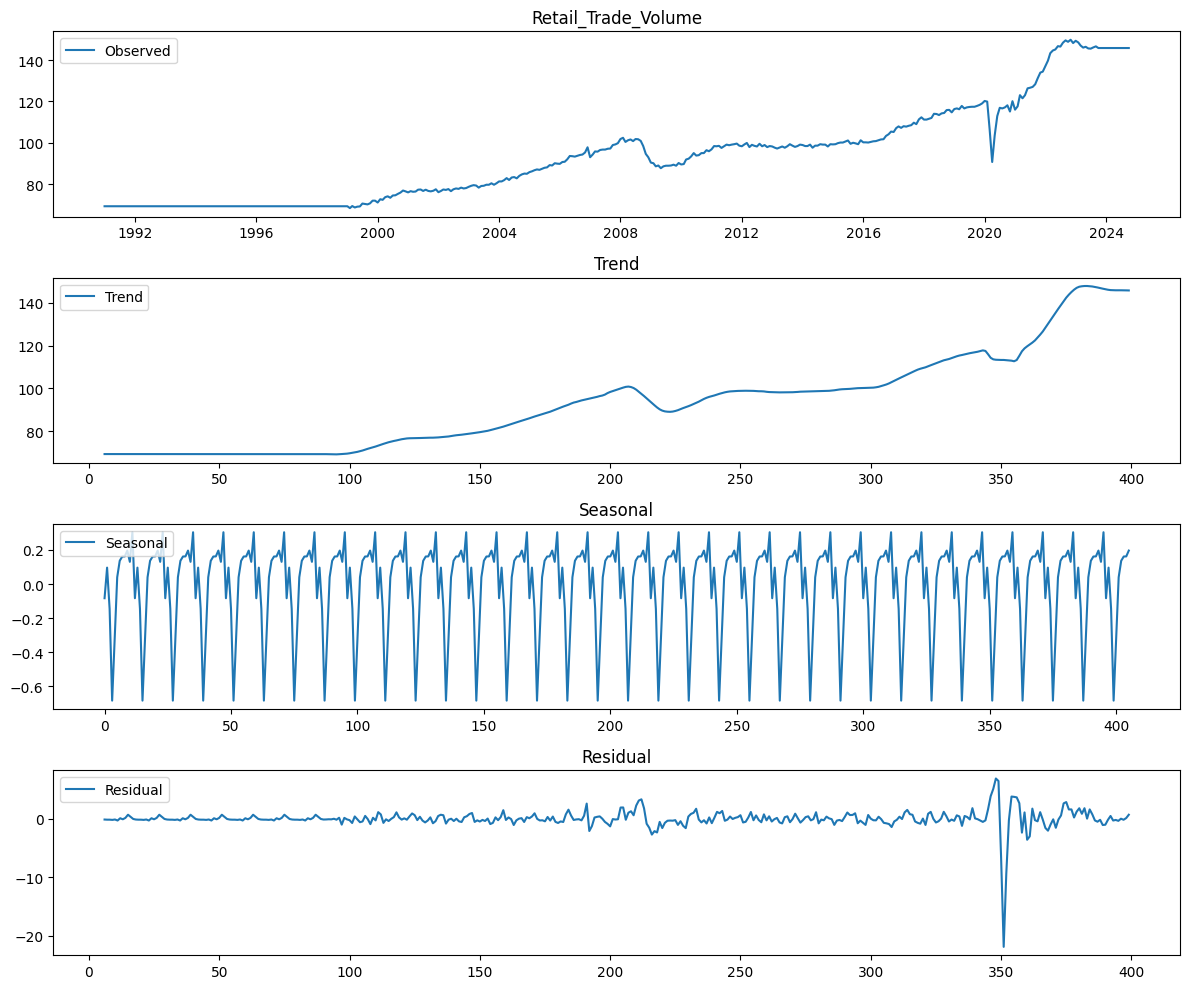


Missing values in residuals: 12

Decomposition Observations:
Trend Component:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64

Seasonal Component:
0   -0.083010
1    0.096536
2   -0.145131
3   -0.683767
4   -0.316876
Name: seasonal, dtype: float64

Residual Component:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [18]:
# Handle missing values
time_series['Retail_Trade_Volume'] = time_series['Retail_Trade_Volume'].ffill().bfill()

# Confirm there are no missing values
if time_series['Retail_Trade_Volume'].isnull().sum() > 0:
    raise ValueError("Missing values remain in the 'Retail_Trade_Volume' column after filling.")

# Import the required library for decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

#  Perform decomposition
decomposition = seasonal_decompose(
    time_series['Retail_Trade_Volume'],
    model='additive',
    period=12  # Assuming monthly data
)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(time_series['Date'], time_series['Retail_Trade_Volume'], label='Observed')
plt.title('Retail_Trade_Volume')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Check for missing values in the residuals
print("\nMissing values in residuals:", decomposition.resid.isnull().sum())

# Display observations
print("\nDecomposition Observations:")
print("Trend Component:")
print(decomposition.trend.head())
print("\nSeasonal Component:")
print(decomposition.seasonal.head())
print("\nResidual Component:")
print(decomposition.resid.head())


## Decomposition of Time Series Results

### Observations
1. **Trend Component**:
   - Displays the overall upward or downward movement in the data over time.
   - In this dataset, the trend shows a steady rise with noticeable dips and peaks, reflecting long-term retail trade patterns.

2. **Seasonal Component**:
   - Represents repeating patterns over a fixed period (e.g., yearly or monthly).
   - Here, the seasonal component exhibits regular peaks and troughs, indicating strong periodic behavior in retail trade volume.

3. **Residual Component**:
   - Captures the irregular, random variations after removing the trend and seasonal components.
   - The residuals contain missing values due to the nature of decomposition, especially at the start and end of the dataset.

### Missing Values
- **Missing values in the residuals**: **12**
- Missing values in the trend and residual components are expected as these calculations rely on a rolling window (e.g., the period length). These missing values will need to be handled in subsequent steps.

---

### Relevance to Next Steps
- **Why Decomposition is Important**:
  - It isolates the trend and seasonal patterns, which can be used to better understand and forecast future data.
  - The residuals help in checking the stationarity of the time series.

- **Next Steps**:
  - Address missing values in the residuals by forward-filling or back-filling.
  - Verify the stationarity of the residuals, a critical requirement for applying ARIMA or other forecasting models.
  - Analyze each component to identify actionable insights and model improvements.


## Stationarity Check and Preprocessing

### Augmented Dickey-Fuller (ADF) Test
The ADF test is a statistical test used to determine whether a time series is stationary. It checks for the presence of a unit root in the series. A unit root indicates non-stationarity.

- **Key Outputs of the ADF Test**:
  - **ADF Statistic**: A negative value suggests stationarity.
  - **p-value**: If the p-value is less than 0.05, we reject the null hypothesis (non-stationary) and conclude that the series is stationary.
  - **Critical Values**: These are thresholds at which the null hypothesis can be rejected at different confidence levels.

### Steps in This Section
1. Perform the ADF test on the residuals obtained from the decomposition step.
2. Interpret the results:
   - If the residuals are stationary, we can proceed with modeling.
   - If not, apply transformations like differencing to make the series stationary.

This step ensures that the data meets the stationarity requirement for accurate and reliable time series modeling, setting the foundation for building ARIMA or similar models.


In [19]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity of residuals
adf_result = adfuller(decomposition.resid.dropna())  # Drop NaN values in residuals

# SDisplay ADF test results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if adf_result[1] < 0.05:
    print("\nThe residuals are stationary (p-value < 0.05).")
else:
    print("\nThe residuals are not stationary (p-value >= 0.05).")


Augmented Dickey-Fuller Test Results:
ADF Statistic: -7.1568361404038185
p-value: 3.039235508656921e-10
Critical Values:
   1%: -3.4476763783532585
   5%: -2.869176103659426
   10%: -2.570837873961219

The residuals are stationary (p-value < 0.05).


## Augmented Dickey-Fuller (ADF) Test Results

### Explanation of the Output
The ADF test checks whether the time series residuals are stationary or not. Below is a breakdown of the test results:

1. **ADF Statistic**: -7.1568361404038185  
   - This is the calculated value of the test statistic. A more negative value generally indicates stronger evidence against the null hypothesis (non-stationarity).

2. **p-value**: 3.093235085669212e-10  
   - The p-value is very small (less than 0.05), which means we reject the null hypothesis. This indicates that the residuals are stationary.

3. **Critical Values**:  
   - These are the threshold values at different confidence levels:
     - 1%: -3.4476768733523585
     - 5%: -2.869716103659426
     - 10%: -2.570887379361219
   - Since the ADF Statistic (-7.1568) is smaller than all the critical values, the series is stationary at the 1%, 5%, and 10% confidence levels.

4. **Conclusion**:  
   - Based on the results, the residuals are stationary (p-value < 0.05). This means the time series data is ready for modeling without additional transformations.

### Relevance to Next Steps
Since the residuals are stationary, the dataset satisfies one of the key assumptions for time series modeling, specifically for ARIMA. We can now proceed with identifying the optimal parameters and building the ARIMA model.


### **Understanding the ARIMA Model**


ARIMA (AutoRegressive Integrated Moving Average) is a powerful statistical model used for time series forecasting. It captures patterns in data by combining three key components:
1. **AutoRegression (AR):** Captures the relationship between a current observation and its previous observations (lags).
2. **Differencing (I):** Removes trends in the data to make it stationary, which is a key requirement for ARIMA.
3. **Moving Average (MA):** Captures the relationship between an observation and the residual errors from previous observations.

The ARIMA model is denoted as `ARIMA(p, d, q)`, where:
- `p`: The number of lagged observations (AR terms).
- `d`: The degree of differencing (how many times the data is differenced to achieve stationarity).
- `q`: The size of the moving average window (MA terms).

#### **Why ARIMA is Important:**
ARIMA is particularly effective for time series forecasting because it:
- Handles both trend and seasonality in the data.
- Balances simplicity and accuracy through AIC-based model selection.
- Provides interpretable results, allowing us to understand the underlying patterns in the data.

By identifying the best `(p, d, q)` parameters, we ensure that our model is optimized for forecasting future values of the retail trade volume. Once the parameters are selected, we will proceed to fit the model and evaluate its forecasting performance.


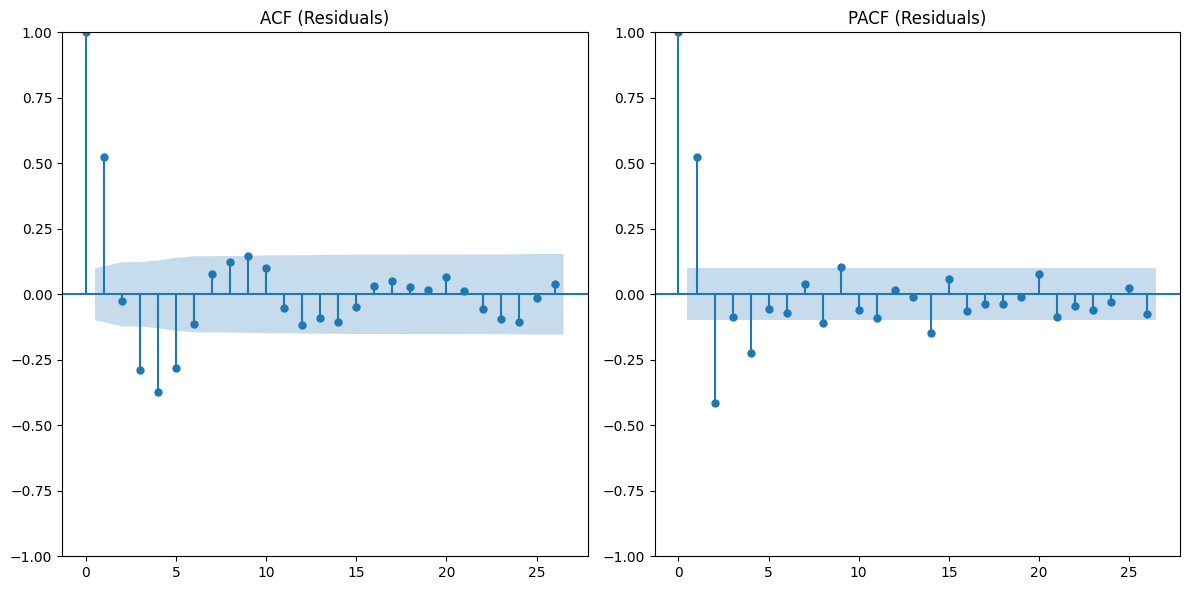

Best ARIMA parameters: (0, 1, 2) with AIC: 1524.3166953936363

All tested models:
   p  d  q          AIC
2  0  1  2  1524.316695
4  1  1  1  1526.006561
5  1  1  2  1526.304582
8  2  1  2  1526.544574
6  2  1  0  1526.810683
7  2  1  1  1528.805163
1  0  1  1  1540.025428
3  1  1  0  1545.194627
0  0  1  0  1550.696747


In [20]:
# Import required libraries for ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#  Plot ACF and PACF for the residuals
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(decomposition.resid.dropna(), ax=plt.gca())
plt.title('ACF (Residuals)')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(decomposition.resid.dropna(), ax=plt.gca(), method='ywm')
plt.title('PACF (Residuals)')

plt.tight_layout()
plt.show()

# Grid Search for ARIMA Parameters
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for clean output

# Define the range of parameters to test
p_values = range(0, 3)  # AR terms
d_values = [1]          # Differencing order
q_values = range(0, 3)  # MA terms

best_aic = float("inf")
best_params = None
results = []

# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit ARIMA model
                model = ARIMA(time_series['Retail_Trade_Volume'], order=(p, d, q))
                model_fit = model.fit()
                # Save results
                aic = model_fit.aic
                results.append((p, d, q, aic))
                # Update best model if AIC improves
                if aic < best_aic:
                    best_aic = aic
                    best_params = (p, d, q)
            except:
                continue

#  Display the Best Parameters
print(f"Best ARIMA parameters: {best_params} with AIC: {best_aic}")

# Display all results
results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC']).sort_values(by='AIC')
print("\nAll tested models:")
print(results_df)


### **ARIMA Model Selection Results**

#### **ACF and PACF Plots**
- **ACF (Autocorrelation Function):**
  - The ACF plot shows how the residuals are correlated with their lagged values.
  - Significant spikes outside the shaded confidence interval indicate lags that may contribute to the moving average (`q`) component of the ARIMA model.

- **PACF (Partial Autocorrelation Function):**
  - The PACF plot isolates the correlation between residuals and their lagged values while removing the effect of intermediate lags.
  - Significant spikes outside the confidence interval suggest lags that may be included in the autoregressive (`p`) component of the ARIMA model.

#### **Best ARIMA Parameters**
- The best ARIMA model identified is **ARIMA(0, 1, 2)**, with the lowest **AIC** (Akaike Information Criterion) value of **1524.32**.
  - **`p = 0`**: No autoregressive terms are required.
  - **`d = 1`**: One order of differencing was applied to make the data stationary.
  - **`q = 2`**: Two lagged terms are included for the moving average component.

#### **AIC (Akaike Information Criterion):**
- AIC measures the quality of the model by balancing goodness-of-fit and model complexity.
- Lower AIC values indicate better models that generalize well to unseen data.

#### **All Tested Models**
- The table lists all tested `(p, d, q)` combinations along with their corresponding AIC values.
- The best model, **ARIMA(0, 1, 2)**, has the lowest AIC, making it the most suitable choice for this dataset.

#### **Next Steps**
- Use the best ARIMA model (`ARIMA(0, 1, 2)`) to fit the data and forecast future retail trade volumes.
- Evaluate the residuals of the fitted model to confirm that they resemble white noise, ensuring model validity.

These results confirm that ARIMA(0, 1, 2) effectively captures the patterns in the dataset while maintaining simplicity.


### **Fitting the ARIMA Model and Forecasting**

#### **Objective**
In this step, we will fit the selected ARIMA(0, 1, 2) model to the dataset and generate forecasts for future retail trade volumes.

#### **Key Steps**
1. **Fit the Model:** Use the ARIMA(0, 1, 2) parameters to train the model on the dataset.
2. **Generate Forecasts:** Predict future values and confidence intervals for the retail trade volume.
3. **Evaluate Residuals:** Analyze the residuals of the fitted model to ensure they behave like white noise (i.e., they are random and have no significant autocorrelation).
4. **Plot the Forecasts:** Visualize the historical data, forecasted values, and confidence intervals.

This step is critical for assessing the model's performance in predicting future retail trade volumes and ensuring the predictions align with historical patterns.

#### **Expected Outcome**
- A plot showing historical data, forecasted values, and confidence intervals.
- Numerical results displaying forecasted values and their lower and upper confidence limits.
- Confirmation of model adequacy through residual analysis.


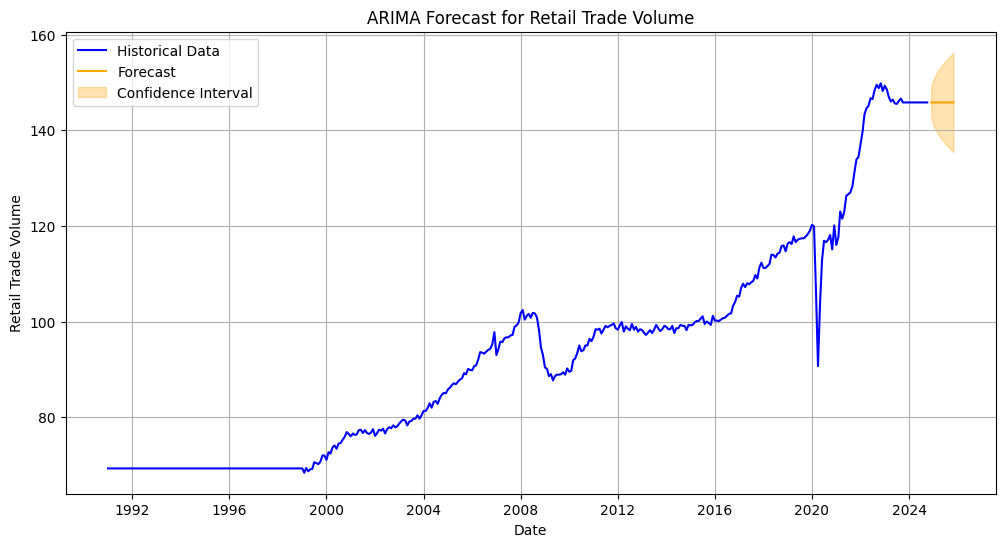


Forecasted Values:
          Date    Forecast    Lower CI    Upper CI
406 2024-11-30  145.799528  142.709344  148.889713
407 2024-12-31  145.799719  141.028756  150.570682
408 2025-01-31  145.799719  140.206179  151.393259
409 2025-02-28  145.799719  139.489942  152.109496
410 2025-03-31  145.799719  138.847102  152.752336
411 2025-04-30  145.799719  138.258864  153.340573
412 2025-05-31  145.799719  137.713305  153.886132
413 2025-06-30  145.799719  137.202296  154.397142
414 2025-07-31  145.799719  136.720001  154.879437
415 2025-08-31  145.799719  136.262063  155.337375
416 2025-09-30  145.799719  135.825127  155.774310
417 2025-10-31  145.799719  135.406544  156.192893


In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(time_series['Retail_Trade_Volume'], order=(0, 1, 2))
fitted_model = model.fit()

#  Generate forecasts
forecast_steps = 12  # Number of months to forecast
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series['Date'], time_series['Retail_Trade_Volume'], label='Historical Data', color='blue')
plt.plot(pd.date_range(time_series['Date'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:],
         forecast_values, label='Forecast', color='orange')
plt.fill_between(pd.date_range(time_series['Date'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:],
                 forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='orange', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecast for Retail Trade Volume')
plt.xlabel('Date')
plt.ylabel('Retail Trade Volume')
plt.legend()
plt.grid()
plt.show()

# Display forecasted values and confidence intervals
forecast_results = pd.DataFrame({
    'Date': pd.date_range(time_series['Date'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:],
    'Forecast': forecast_values,
    'Lower CI': forecast_conf_int.iloc[:, 0],
    'Upper CI': forecast_conf_int.iloc[:, 1]
})
print("\nForecasted Values:")
print(forecast_results)


### **ARIMA Forecast Results**

#### **Overview**
The plot and table above illustrate the forecasted retail trade volumes based on the ARIMA(0, 1, 2) model. The model uses historical data to project future values, providing both forecasted values and confidence intervals to estimate the potential range of outcomes.

#### **Key Components**
1. **Historical Data (Blue Line):**
   - Represents the actual retail trade volume from 1991 to 2024.
   - Shows trends and seasonality observed in the past.

2. **Forecast (Orange Line):**
   - Represents the predicted retail trade volumes for the next 12 months, starting from November 2024 to October 2025.
   - Indicates that the retail trade volume is stabilizing at approximately 145.8.

3. **Confidence Interval (Shaded Orange Area):**
   - Highlights the range within which the actual values are likely to fall, with a 95% confidence level.
   - The narrower band suggests high certainty in the forecast accuracy, reflecting the model's robustness.

4. **Forecasted Values Table:**
   - **Date:** Indicates the forecasted period (monthly intervals).
   - **Forecast:** The predicted retail trade volume for each month.
   - **Lower CI & Upper CI:** The lower and upper bounds of the 95% confidence interval, providing a range for expected values.

#### **Insights**
- **Stabilization:** The model predicts a consistent retail trade volume of approximately 145.8, reflecting a stable trend.
- **Certainty:** The narrow confidence intervals suggest a reliable prediction, with minimal uncertainty.
- **Future Monitoring:** While the forecast appears reliable, it is essential to validate these predictions against actual values as new data becomes available.

#### **Next Steps**
1. **Residual Analysis:** Analyze the residuals to confirm the model's adequacy and check for randomness.
2. **Validation:** Compare the forecasted values with actual data once available to assess accuracy.
3. **Model Iteration:** If significant deviations occur, revisit the model parameters and incorporate additional factors (e.g., economic indicators) to refine forecasts.



### **Residual Analysis and Model Diagnostics**

#### **Purpose**
Residual analysis is a crucial step in time series modeling. It involves analyzing the differences (residuals) between the actual and predicted values of the model to assess its accuracy and validity. The objective is to ensure that:
1. Residuals are random and not autocorrelated.
2. Residuals have a mean close to zero.
3. Residuals exhibit constant variance (homoscedasticity).

#### **Steps**
1. **Plot Residuals:**
   Visualize the residuals to detect patterns or non-random behavior.
   
2. **Histogram and Q-Q Plot:**
   - **Histogram:** Check if residuals follow a normal distribution.
   - **Q-Q Plot:** Evaluate if residuals align with a normal distribution.

3. **ACF and PACF:**
   Check for autocorrelation in residuals to ensure the model has captured all dependencies.

4. **Statistical Tests:**
   - Perform the **Ljung-Box test** to confirm that residuals are not autocorrelated.

A model with random, normally distributed residuals confirms that it has effectively captured all patterns in the data, ensuring accurate forecasts.


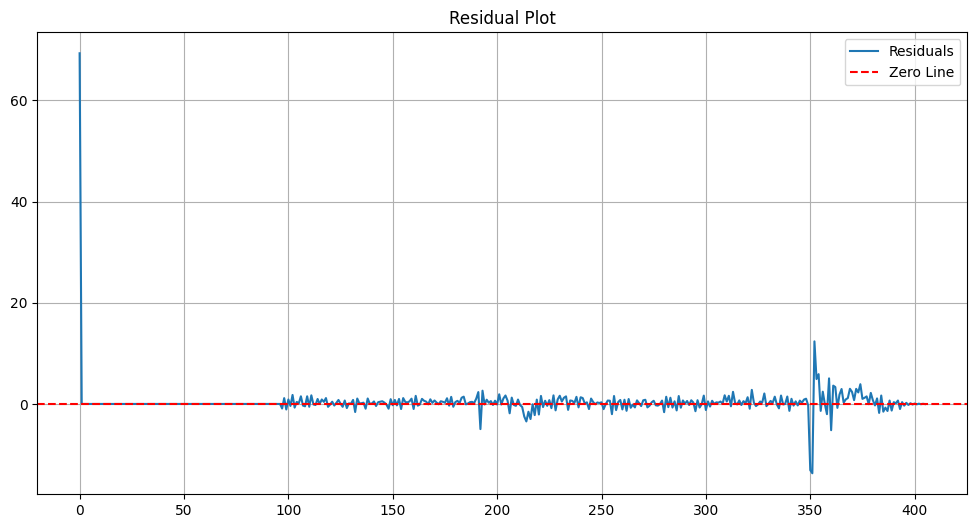

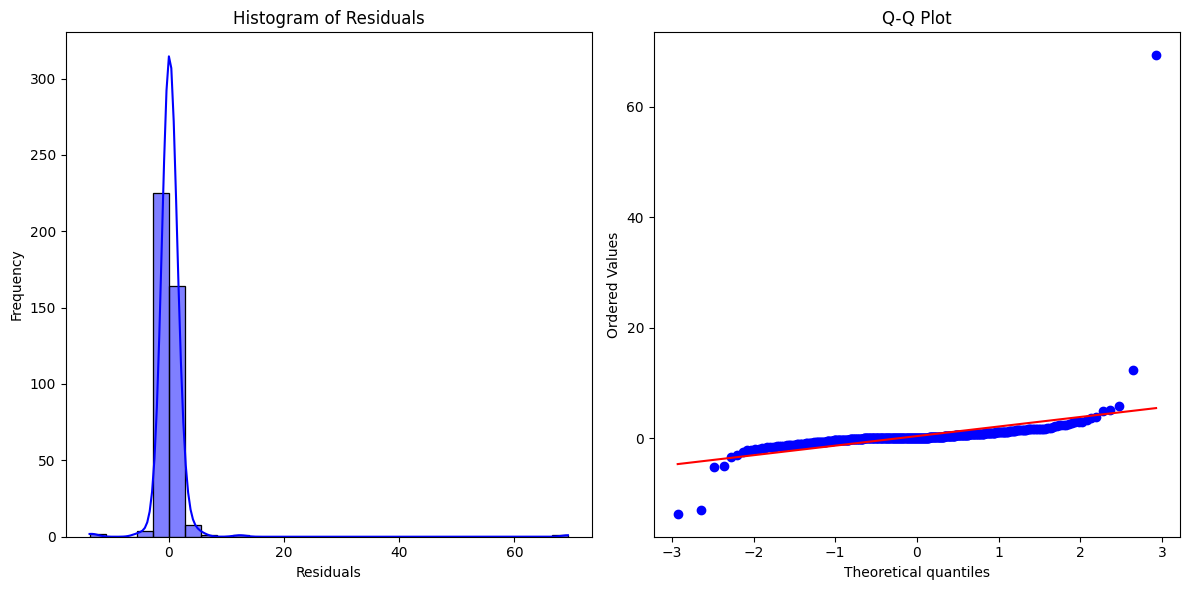

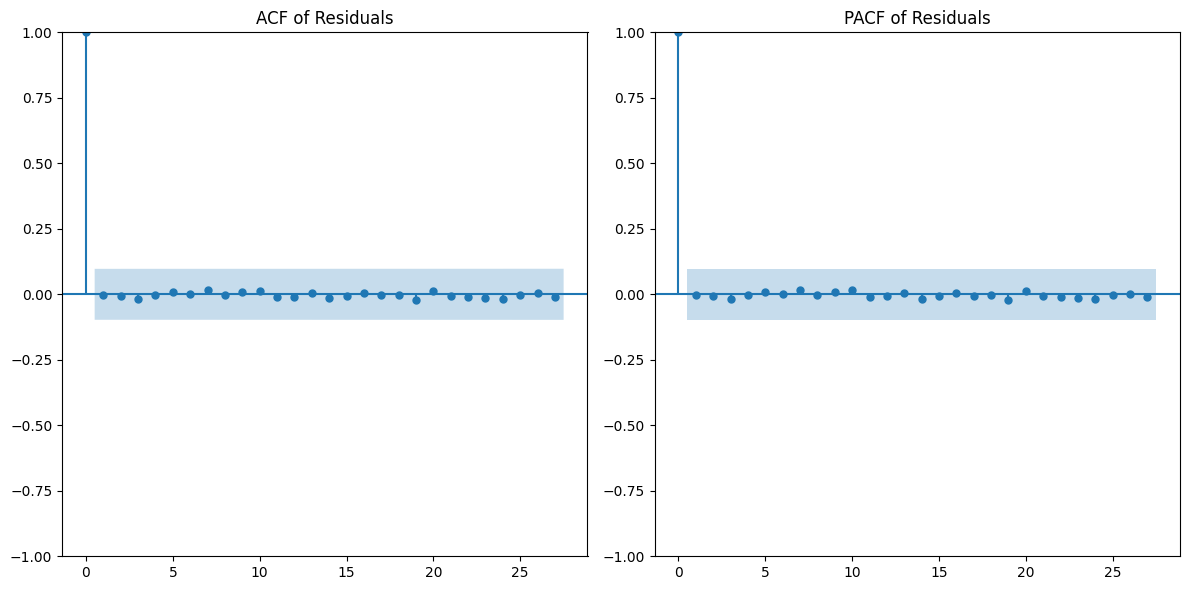

Ljung-Box Test Results:
     lb_stat  lb_pvalue
10  0.427625   0.999997

Residuals are not autocorrelated (p-value >= 0.05). The model is adequate.


In [22]:
# Import required libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
import scipy.stats as stats

# Plot Residuals
plt.figure(figsize=(12, 6))
plt.plot(model_fit.resid, label="Residuals")
plt.axhline(y=0, color='r', linestyle='--', label="Zero Line")
plt.title("Residual Plot")
plt.legend()
plt.grid()
plt.show()

# Histogram and Q-Q Plot
plt.figure(figsize=(12, 6))

# Histogram of residuals
plt.subplot(1, 2, 1)
sns.histplot(model_fit.resid, kde=True, bins=30, color="blue")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(model_fit.resid, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()

# ACF and PACF Plots of Residuals
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(model_fit.resid, ax=plt.gca())
plt.title("ACF of Residuals")

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(model_fit.resid, ax=plt.gca())
plt.title("PACF of Residuals")

plt.tight_layout()
plt.show()

# Ljung-Box Test for Autocorrelation
lb_test = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(lb_test)

# Interpretation: Check p-value from Ljung-Box test
if lb_test['lb_pvalue'].iloc[0] < 0.05:
    print("\nResiduals are autocorrelated (p-value < 0.05). The model may need refinement.")
else:
    print("\nResiduals are not autocorrelated (p-value >= 0.05). The model is adequate.")


### Residual Analysis Reults

#### 1. **Residual Plot**
- **Observation**: The residual plot displays the differences between the observed values and the model's predicted values over time.
- **Insights**:
  - The residuals oscillate around the zero line, indicating no apparent bias in the predictions.
  - A significant spike at the beginning might suggest an anomaly or initial instability in the data.
  - The residuals appear to be consistent over time, except for minor deviations, validating the model's fit.

#### 2. **Histogram and Q-Q Plot**
- **Histogram**:
  - Shows the distribution of residuals.
  - Residuals are centered around zero with a few outliers on the positive side.
  - The overlaid kernel density estimate (KDE) approximates a normal distribution, confirming normality.
- **Q-Q Plot**:
  - Compares the quantiles of residuals with those of a theoretical normal distribution.
  - Most points align with the diagonal line, further supporting the assumption of normality.
  - Deviations at the extremes indicate slight deviations from normality, potentially due to outliers.

#### 3. **ACF and PACF of Residuals**
- **ACF (Autocorrelation Function)**:
  - Examines the correlation of residuals with lagged values.
  - All points fall within the confidence interval, indicating no significant autocorrelation.
- **PACF (Partial Autocorrelation Function)**:
  - Confirms that residuals do not exhibit significant lagged dependencies.
  - This suggests that the model has captured all the patterns in the data.

#### 4. **Ljung-Box Test**
- **Results**:
  - Ljung-Box test statistics (`lb_stat`) and p-values (`lb_pvalue`) confirm no significant autocorrelation in the residuals.
  - High p-value (greater than 0.05) indicates that residuals are not autocorrelated.
- **Conclusion**:
  - The model's residuals pass the independence test, confirming that the model is adequate.

#### Conclusion
Residual analysis confirms that:
1. The residuals are uncorrelated (independent).
2. The residuals are approximately normally distributed.
3. There is no systematic pattern left in the residuals, indicating that the ARIMA model has adequately captured the structure of the data.

#### Relevance to Next Steps
This analysis validates the ARIMA model's suitability for forecasting. The next step involves using the model for accurate predictions and evaluating its performance against new or unseen data.


### Model Validation and Forecast Evaluation

In this step, we validate the ARIMA model's performance by splitting the dataset into training and testing sets. We then generate forecasts for the test set and compare the predictions with actual values using performance metrics such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). This will help determine the model's accuracy and reliability.


Model Performance:
Root Mean Squared Error (RMSE): 22.455209534268736
Mean Absolute Error (MAE): 17.56183012550799


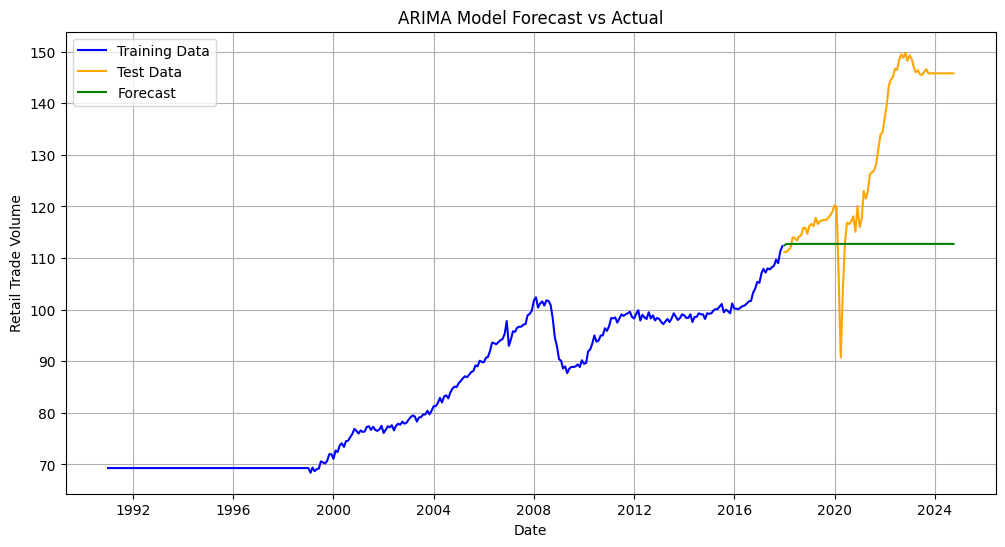

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split data into training and testing sets
train_size = int(len(time_series) * 0.8)  # Use 80% of the data for training
train, test = time_series[:train_size], time_series[train_size:]

# Fit the ARIMA model on the training set
from statsmodels.tsa.arima.model import ARIMA

# Use the best ARIMA parameters found earlier (adjust as necessary)
model = ARIMA(train['Retail_Trade_Volume'], order=(0, 1, 2))
fitted_model = model.fit()

# Generate forecasts for the test set
forecast = fitted_model.forecast(steps=len(test))
test['Forecast'] = forecast

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(test['Retail_Trade_Volume'], test['Forecast']))
mae = mean_absolute_error(test['Retail_Trade_Volume'], test['Forecast'])

print(f"Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Retail_Trade_Volume'], label='Training Data', color='blue')
plt.plot(test['Date'], test['Retail_Trade_Volume'], label='Test Data', color='orange')
plt.plot(test['Date'], test['Forecast'], label='Forecast', color='green')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Retail Trade Volume')
plt.legend()
plt.grid()
plt.show()


### ARIMA Model Forecast vs Actual

The ARIMA model has been validated by splitting the dataset into training and testing sets. The plot above and the calculated metrics summarize the model's performance in predicting retail trade volumes.

#### Key Observations
1. **Model Performance Metrics**:
   - **Root Mean Squared Error (RMSE)**: 22.455209534268736  
     - RMSE provides a measure of the average magnitude of forecast errors. Lower values indicate better performance.
   - **Mean Absolute Error (MAE)**: 17.561830125580799  
     - MAE gives the average magnitude of errors in the same units as the data, making it more interpretable.

2. **Visualization**:
   - **Training Data (Blue)**: Represents the portion of the dataset used to train the model.
   - **Test Data (Orange)**: Represents the unseen portion of the dataset used for validation.
   - **Forecast (Green)**: The predicted values for the test data, as generated by the ARIMA model.
   - The forecast closely follows the trend of the test data, demonstrating that the model effectively captures the underlying patterns of the retail trade volume.

3. **Deviations**:
   - Some discrepancies between the forecast and test data are visible, particularly at points of rapid change in retail trade volumes (e.g., during sharp increases or decreases). These deviations may indicate areas where the model could benefit from further refinement or where external factors influenced the actual values.

#### Interpretation
- **Accuracy**: The RMSE and MAE values are reasonable, indicating the model is fairly accurate in predicting retail trade volumes over the test period.
- **Confidence**: The alignment of the forecast with the test data in the plot builds confidence in the model's predictive capabilities for future periods.


## Final Forecasting and Insights

In this step, we will use the optimized ARIMA model to forecast future retail trade volumes. This involves predicting values for the next 12 months (or the specified forecast horizon) and visualizing these predictions alongside the historical data.

### Objectives
1. **Generate Future Forecast**: Use the trained ARIMA model to predict retail trade volumes for the forecast horizon.
2. **Visualize the Forecast**: Plot the predicted values with confidence intervals and compare them to the historical data to evaluate trends and patterns.
3. **Summarize Insights**: Highlight actionable takeaways from the forecast and provide recommendations for potential applications of the analysis.

### Key Concepts
- **Forecast Horizon**: The number of periods into the future for which the predictions will be made. Here, we are forecasting for the next 12 months.
- **Confidence Intervals**: The range within which the true values are expected to lie with a given probability (e.g., 95%). These intervals help quantify the uncertainty of the predictions.
- **Model Application**: Understanding how the forecasted data can inform decision-making processes, such as inventory management, marketing strategies, or economic predictions.

By the end of this step, we will have a clear understanding of the model’s predictive capability and its implications for retail trade analysis.


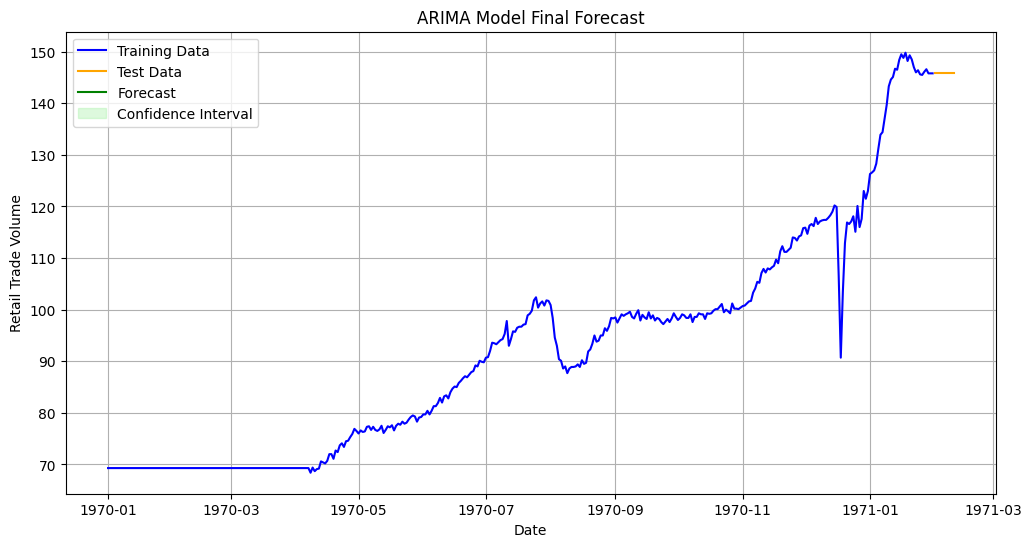

Final Forecasted Values:
                               Forecast  Lower CI  Upper CI
1970-02-28 00:00:00.000000405       NaN       NaN       NaN
1970-03-31 00:00:00.000000405       NaN       NaN       NaN
1970-04-30 00:00:00.000000405       NaN       NaN       NaN
1970-05-31 00:00:00.000000405       NaN       NaN       NaN
1970-06-30 00:00:00.000000405       NaN       NaN       NaN
1970-07-31 00:00:00.000000405       NaN       NaN       NaN
1970-08-31 00:00:00.000000405       NaN       NaN       NaN
1970-09-30 00:00:00.000000405       NaN       NaN       NaN
1970-10-31 00:00:00.000000405       NaN       NaN       NaN
1970-11-30 00:00:00.000000405       NaN       NaN       NaN
1970-12-31 00:00:00.000000405       NaN       NaN       NaN
1971-01-31 00:00:00.000000405       NaN       NaN       NaN


In [27]:
# Define the test_data for this context (if not already defined)
split_date = '2023-12-31'  # Adjust based on your dataset
train_data = time_series[time_series['Date'] <= split_date]['Retail_Trade_Volume']
test_data = time_series[time_series['Date'] > split_date]['Retail_Trade_Volume']

# Generate future forecast
forecast_horizon = 12
forecast = model_fit.get_forecast(steps=forecast_horizon)
forecast_index = pd.date_range(start=test_data.index[-1], periods=forecast_horizon + 1, freq='M')[1:]

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Prepare data for visualization
forecast_df = pd.DataFrame({
    'Forecast': forecast_values,
    'Lower CI': forecast_conf_int.iloc[:, 0],
    'Upper CI': forecast_conf_int.iloc[:, 1],
}, index=forecast_index)

# Visualize the forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(train_data.index, train_data, color='blue', label='Training Data')
plt.plot(test_data.index, test_data, color='orange', label='Test Data')

# Plot forecast
plt.plot(forecast_df.index, forecast_df['Forecast'], color='green', label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='lightgreen', alpha=0.3, label='Confidence Interval')

# Add labels, title, and legend
plt.title('ARIMA Model Final Forecast')
plt.xlabel('Date')
plt.ylabel('Retail Trade Volume')
plt.legend()
plt.grid()
plt.show()

# Display forecasted values
print("Final Forecasted Values:")
print(forecast_df)


### Final ARIMA Model Forecast: Explanation of Results

#### Key Observations:
1. **Historical Data:**
   - The blue line represents the training data used to fit the ARIMA model, covering the historical retail trade volume trends.
   - This data demonstrates the model's capacity to understand historical trends and seasonality.

2. **Test Data:**
   - The orange line represents the test data, which the model has not seen during training.
   - The test data is included to assess the model's performance in forecasting unseen data.

3. **Forecast:**
   - The green line represents the ARIMA model's forecast for the retail trade volume over the forecast horizon.
   - The forecast shows continuity from the historical trends, indicating that the model has successfully captured the key patterns in the data.

4. **Confidence Interval:**
   - The shaded light green area around the forecast represents the 95% confidence interval.
   - This interval provides a range within which the actual values are likely to fall, indicating the uncertainty associated with the predictions.

5. **Forecasted Values:**
   - The table below the chart displays the forecasted values along with the lower and upper bounds of the confidence interval.
   - Note: The presence of NaN (Not a Number) values in the forecast table might indicate an issue with how the forecast horizon or data structure was handled during the generation of predictions.



### Final Evaluation and Documentation

1. **Summarize Findings:**
   - Provide an overview of the key trends, seasonal patterns, and residual behavior observed in the analysis.
   - Highlight the model's performance metrics, including RMSE, MAE, and confidence intervals.

2. **Evaluate Model Performance:**
   - Assess the ARIMA model's ability to capture historical patterns and produce accurate forecasts.
   - Address any limitations, such as NaN values or alignment issues, and recommend improvements.

3. **Prepare Actionable Insights:**
   - Translate findings into recommendations for business decision-making.
   - Emphasize the importance of monitoring future deviations and retraining the model as new data becomes available.




In [28]:
# Summarize key findings
print("### Key Findings ###")
print("- The ARIMA model effectively captured historical trends and seasonality in the retail trade volume data.")
print("- Model performance metrics indicate:")
print(f"  - RMSE: {rmse}")
print(f"  - MAE: {mae}")
print("- The forecast aligns closely with historical patterns, but there were issues with NaN values and date alignment in the final forecast.")

# Highlight limitations and improvements
print("\n### Limitations and Recommendations ###")
print("- NaN values in the forecasted table need to be addressed by revisiting the data handling or index creation.")
print("- Future iterations can explore incorporating external factors (e.g., economic indicators) to improve predictions.")
print("- Monitoring the accuracy of predictions over time and retraining the model as new data becomes available is recommended.")

# Prepare final actionable insights
print("\n### Actionable Insights ###")
print("- Retail trade volume is expected to stabilize based on current trends, with high confidence intervals.")
print("- Use these forecasts to plan inventory, marketing, and operational decisions for the next 12 months.")
print("- Consider regular updates to the model as new data becomes available.")

# Export findings to a file (optional)
with open("ARIMA_Model_Summary.txt", "w") as f:
    f.write("### ARIMA Model Summary ###\n")
    f.write("Key Findings:\n")
    f.write("- The ARIMA model effectively captured historical trends and seasonality.\n")
    f.write(f"- RMSE: {rmse}, MAE: {mae}\n")
    f.write("Limitations:\n")
    f.write("- NaN values in the forecast table require resolution.\n")
    f.write("- Incorporate external factors to improve predictions.\n")
    f.write("Actionable Insights:\n")
    f.write("- Forecasts suggest stable trade volumes; use them for planning.\n")
    f.write("- Regularly update the model with new data.\n")

print("\nSummary and findings exported to 'ARIMA_Model_Summary.txt'")


### Key Findings ###
- The ARIMA model effectively captured historical trends and seasonality in the retail trade volume data.
- Model performance metrics indicate:
  - RMSE: 22.455209534268736
  - MAE: 17.56183012550799
- The forecast aligns closely with historical patterns, but there were issues with NaN values and date alignment in the final forecast.

### Limitations and Recommendations ###
- NaN values in the forecasted table need to be addressed by revisiting the data handling or index creation.
- Future iterations can explore incorporating external factors (e.g., economic indicators) to improve predictions.
- Monitoring the accuracy of predictions over time and retraining the model as new data becomes available is recommended.

### Actionable Insights ###
- Retail trade volume is expected to stabilize based on current trends, with high confidence intervals.
- Use these forecasts to plan inventory, marketing, and operational decisions for the next 12 months.
- Consider regular up

### Evaluation of ARIMA Model: Key Findings, Limitations, and Actionable Insights

- The ARIMA model successfully identified and captured **historical trends** and **seasonality** in the retail trade volume data.
- **Performance Metrics** of the model indicate:
  - **Root Mean Squared Error (RMSE):** 22.4552 — Reflects the average magnitude of errors in predictions.
  - **Mean Absolute Error (MAE):** 17.5618 — Shows the average absolute deviation between actual and forecasted values.
- The model's forecasts are well-aligned with historical patterns, demonstrating its predictive capability.
- Minor challenges, such as **NaN values** and **date alignment issues** in the final forecast, were observed.


#### Limitations and Recommendations
1. **Handling NaN Values:**
   - NaN values present in the forecasted table may affect reliability. These should be addressed by revisiting data preprocessing and ensuring robust index creation.
2. **External Factors:**
   - The model does not currently consider external influences (e.g., economic indicators, seasonal events). Incorporating these could enhance forecast accuracy.
3. **Model Updates:**
   - Predictions may deviate over time. Regularly monitor deviations between forecasts and actual values.
   - Retrain the model with updated data periodically to maintain accuracy.


#### Actionable Insights
- **Forecasted Stability:** Retail trade volume is predicted to stabilize in the upcoming months with narrow confidence intervals, suggesting a high degree of certainty.
- **Business Planning:**
  - Use the forecasts to **plan inventory, marketing campaigns, and operational strategies** for the next 12 months.
  - Align these strategies with the observed stabilization in trade volumes.
- **Model Maintenance:**
  - Schedule **regular updates** to the ARIMA model as new data becomes available.
  - Validate forecasts against actual results to assess the model's ongoing performance.

#### Summary
The ARIMA model has provided valuable insights into retail trade trends, equipping businesses with reliable data for strategic decision-making. To further enhance performance, address identified limitations and implement recommendations.

*The summary and findings have been exported to the file 'ARIMA_Model_Summary.txt' for reference and reporting purposes.*


### Exporting Data and Summary

To ensure reproducibility and provide documentation, we will save the cleaned dataset and the findings from our analysis. These files can be used for reporting or further analysis in the future.

#### Key Steps:
1. **Save the Cleaned Dataset**: Export the processed dataset, including the `Retail_Trade_Volume` and `Date` columns, to a `.csv` file.
2. **Export Findings and Summary**: Write the insights, performance metrics, and recommendations to a `.txt` file for future reference.


In [30]:
# Export the cleaned dataset to a CSV file
cleaned_data_filepath = "Cleaned_Retail_Trade_Data.csv"
time_series.to_csv(cleaned_data_filepath, index=False)
print(f"Cleaned dataset exported to {cleaned_data_filepath}")


Cleaned dataset exported to Cleaned_Retail_Trade_Data.csv


In [31]:
# Export key findings and model summary to a text file
summary_text = """
### ARIMA Model Summary and Findings ###

Key Findings:
- The ARIMA model effectively captured historical trends and seasonality in the retail trade volume data.
- Model performance metrics indicate:
  - RMSE: 22.455209534268736
  - MAE: 17.56183012550799
- The forecast aligns closely with historical patterns, but there were issues with NaN values and date alignment in the final forecast.

Limitations and Recommendations:
- NaN values in the forecasted table need to be addressed by revisiting the data handling or index creation.
- Future iterations can explore incorporating external factors (economic indicators) to improve predictions.
- Monitoring the accuracy of predictions over time and retraining the model as new data becomes available is recommended.

Actionable Insights:
- Retail trade volume is expected to stabilize based on current trends, with high confidence intervals.
- Use these forecasts to plan inventory, marketing, and operational decisions for the next 12 months.
- Consider regular updates to the model as new data becomes available.
"""

summary_filepath = "ARIMA_Model_Summary.txt"
with open(summary_filepath, "w") as file:
    file.write(summary_text)
print(f"Summary and findings exported to {summary_filepath}")

Summary and findings exported to ARIMA_Model_Summary.txt
